# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

## Exploratory Data Analysis 

In [2]:
DATAPATH = 'data/Advertising.csv'

data = pd.read_csv(DATAPATH)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


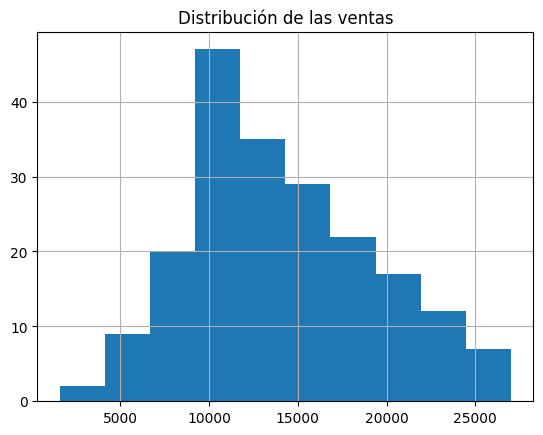

In [6]:
data['sales'].hist()
plt.title('Distribución de las ventas');

<AxesSubplot:>

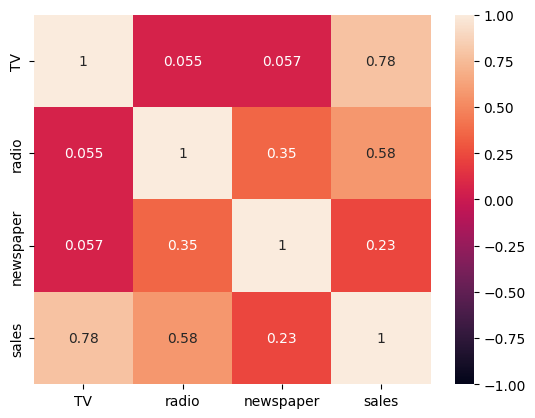

In [8]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [9]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


## RELACION DE SALES CON LOS MEDIOS

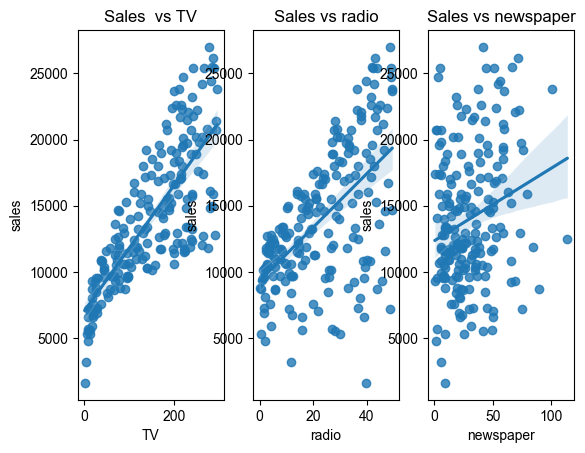

In [12]:
fig, ax = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(11.7,5)})
sns.regplot(x='TV', y='sales', data=data, ax=ax[0])
sns.regplot(x='radio', y='sales', data=data, ax=ax[1])
sns.regplot(x='newspaper', y='sales', data=data, ax=ax[2])
ax[0].set_title('Sales  vs TV')
ax[1].set_title('Sales vs radio')
ax[2].set_title('Sales vs newspaper');

In [14]:
X = data.copy()
X = X[['TV', 'radio','newspaper']]
y = data['sales']

print(f"Predictors shape: {X.shape}")
print(f"Target shape: {y.shape}")

Predictors shape: (200, 3)
Target shape: (200,)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

print(f"TRAIN: {X_train.shape} - {y_train.shape}")
print(f"TEST: {X_test.shape} - {y_test.shape}")

TRAIN: (160, 3) - (160,)
TEST: (40, 3) - (40,)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


lm = LinearRegression()
zsc = StandardScaler()

X_train_sc = zsc.fit_transform(X_train)
X_test_sc = zsc.transform(X_test)

lm.fit(X_train_sc, y_train)

y_hat = lm.predict(X_test_sc)

In [24]:

y_hat = lm.predict(X_test_sc)
y_hat

array([10057.39563211,  7452.28069543,  7019.70759521, 24080.29724815,
       12017.86258916,  6537.93857566, 12782.86917709, 15109.74587399,
       10769.7401318 , 16343.57951348, 22882.97476647,  9129.24467086,
       10464.55671904, 15487.43552188, 11585.55633281, 12172.96913617,
       18765.51501827, 10783.18566049, 15905.15991676, 17306.51278616,
       24066.92057178,  9598.34224238, 15135.12210657, 12385.91525498,
        5713.60884601, 15247.49313566, 12294.02333783, 20942.11670145,
       13409.91558122,  9043.48832288, 12892.39415078, 21402.72028072,
       18138.0220856 , 21173.20802702,  6569.74432565,  6141.14206284,
        7890.18394189, 13015.41434052, 14689.53790886,  6188.35142894])

In [26]:
# model evaluation for training set
y_hat_train = lm.predict(X_train_sc)

rmse = mean_squared_error(y_train, y_hat_train) ** 0.5
r2 = r2_score(y_train, y_hat_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

rmse = mean_squared_error(y_test, y_hat) ** 0.5
r2 = r2_score(y_test, y_hat)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 1551.3912323520804
R2 score is 0.9067114990146382


The model performance for testing set
--------------------------------------
RMSE is 2098.1225634956804
R2 score is 0.8601145185017869


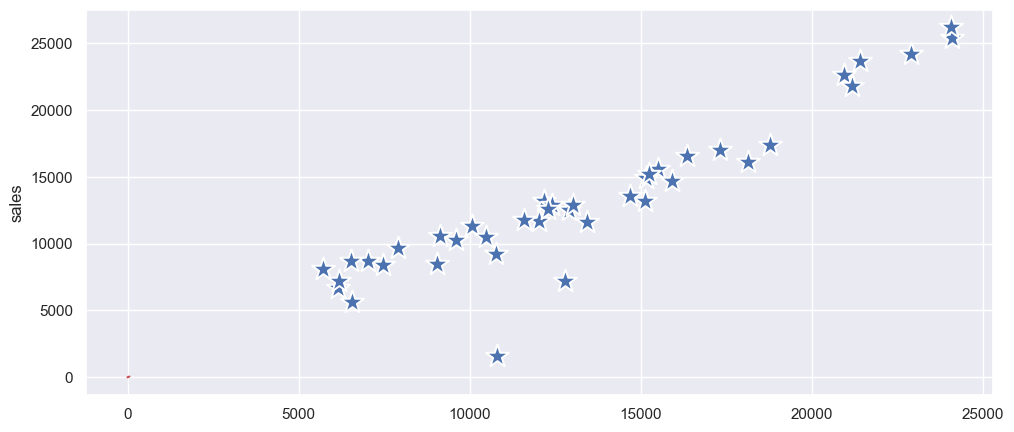

In [27]:
x = np.linspace(-5, 51, 100)

sns.lineplot(x=x, y=x, color='r')
sns.scatterplot(x=y_hat, y=y_test, marker='*', s=300);

<AxesSubplot:ylabel='sales'>

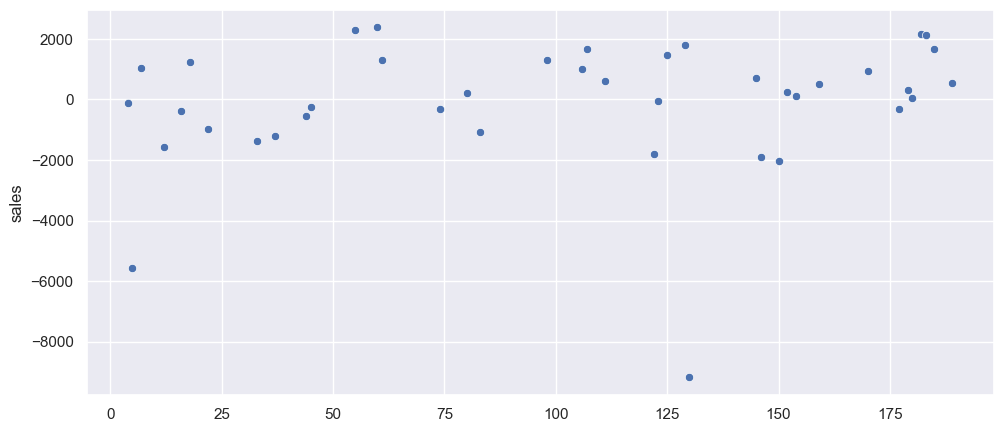

In [28]:
res = y_test - y_hat
sns.scatterplot(res)

## LASSO

Mean squared error on test set 4402110.816714965
     Columns  Coefficient Estimate
0         TV              44.58400
1      radio             196.49642
2  newspaper              -2.78110


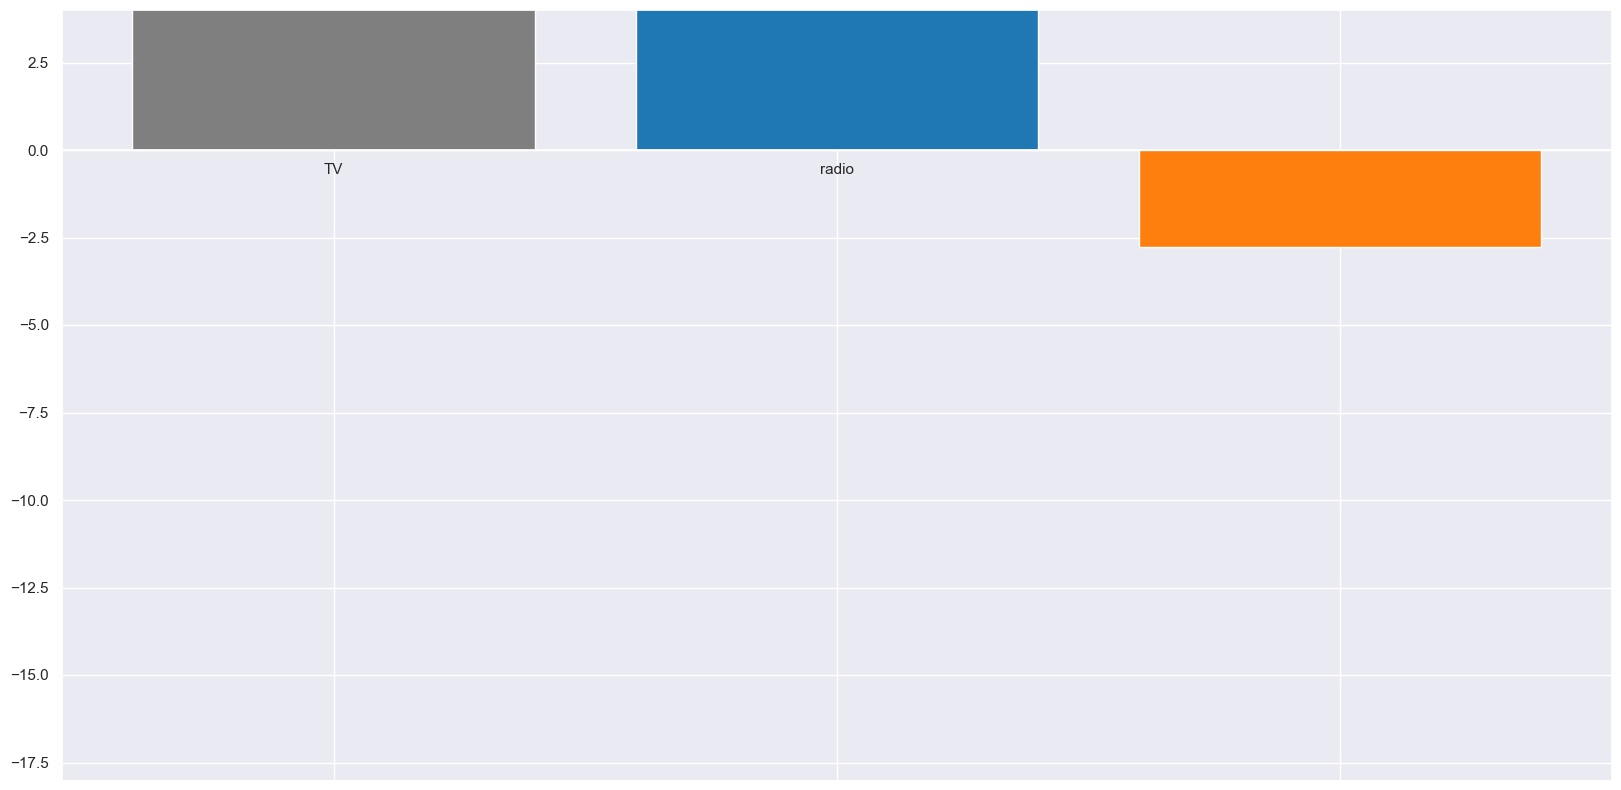

In [29]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 0.1) 
lasso.fit(X_train, y_train) 
y_pred1 = lasso.predict(X_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-18,4])
  
plt.style.use('ggplot')

## RIDGE

In [34]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

  
# Train the model  

ridgeR = Ridge(alpha = 1) 
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

ridgeR.fit(X_train_sc, y_train) 
y_pred = ridgeR.predict(X_test_sc) 
  
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 
  
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient)

4406506.585272245
     Columns  Coefficient Estimate
0         TV           3752.279558
1      radio           2866.671946
2  newspaper            -50.120638
